# Plotly_1

In [214]:
import pandas as pd
import numpy as np
import random
from plotly.subplots import make_subplots
from plotly.offline import plot
import  plotly.express as px 
import plotly.graph_objects as go
import random
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')

In [215]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [216]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [217]:
fig = px.pie(netflix_df['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [218]:
# Rating

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['target_ages'] = netflix_df['rating'].replace(ratings_ages)

def generate_rating_df(netflix_df):
    rating_df = netflix_df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('counts')
    return rating_df

rating_df = generate_rating_df(netflix_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()    

In [219]:
# data clean
netflix_df['genre'] = netflix_df['listed_in'].apply(
    lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

netflix_df['genre']

0       [International TV Shows, TV Dramas, TV Sci-Fi ...
1                          [Dramas, International Movies]
2                   [Horror Movies, International Movies]
3       [Action & Adventure, Independent Movies, Sci-F...
4                                                [Dramas]
                              ...                        
7782                       [Dramas, International Movies]
7783     [Dramas, International Movies, Music & Musicals]
7784    [Documentaries, International Movies, Music & ...
7785                 [International TV Shows, Reality TV]
7786                    [Documentaries, Music & Musicals]
Name: genre, Length: 7787, dtype: object

In [234]:
# data clean
netflix_df = netflix_df[netflix_df['date_added'].notna()]
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x: str(x).split(" ")[-1])
netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])  #strr to numeric
netflix_df['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7777, dtype: int64

In [235]:
#type

movie_df = netflix_df[netflix_df['type'] == 'Movie']     
show_df = netflix_df[netflix_df['type'] == 'TV Show']    

movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()


In [221]:
#country

# Only for first country

netflix_df['first_country'] = netflix_df['country'].apply(lambda x: str(x).split(",")[0])

country_df = netflix_df['first_country'].value_counts().reset_index()
country_df = country_df[country_df['first_country'] /  country_df['first_country'].sum() > 0.01]

fig = px.pie(country_df, values='first_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [222]:
fig = px.histogram(netflix_df, x='first_country')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [223]:
# Distribution of content released


released_year_df = netflix_df.loc[netflix_df['release_year'] > 2000].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = netflix_df.loc[netflix_df['year_added'] > 2000].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [224]:
# Genres Analysis

from sklearn.preprocessing import MultiLabelBinarizer 
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df



def top_genres(movie_df, title='Top ones'):
    genres_df = calculate_mlb(netflix_df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

 
top_genres(movie_df, title='Top Movies Genres')


In [225]:
# Genres Analysis

top_genres(show_df, title='Top TV Shows Genres')

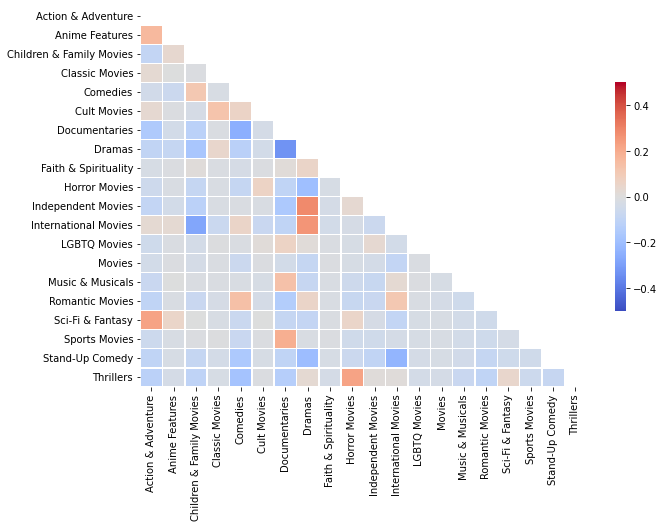

In [226]:
# Genres Analysis



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

genres_df = calculate_mlb(movie_df['genre'])
movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

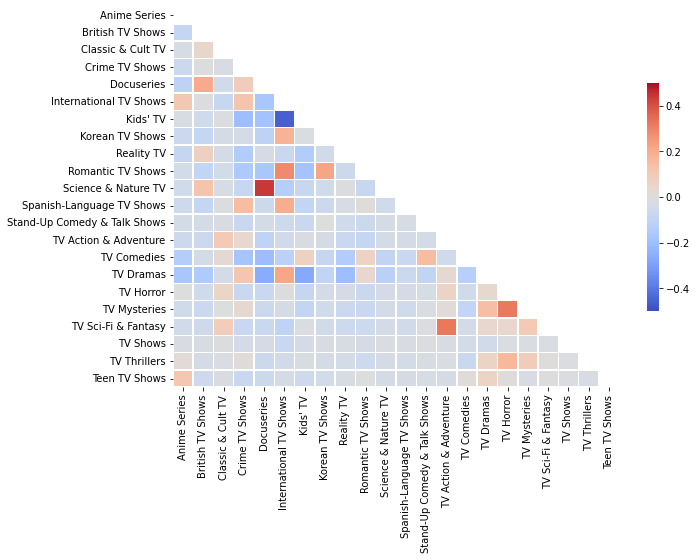

In [227]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

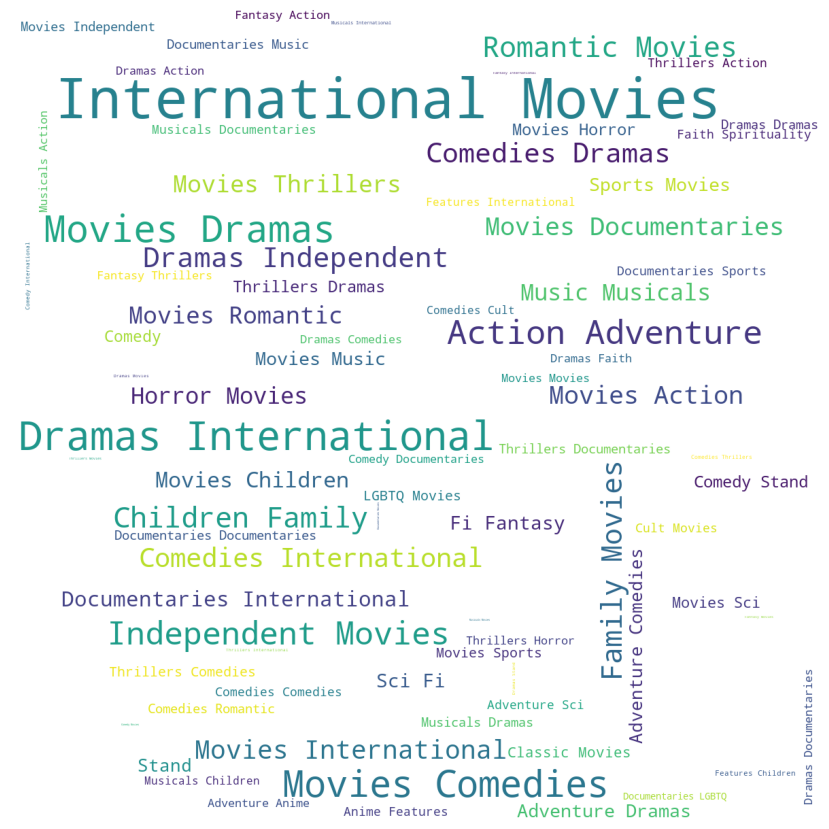

In [228]:
#Word cloud


from wordcloud import WordCloud

text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [229]:
# Duration analysis

fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

In [230]:
# Movie duration Alasysis

temp_duration = movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))
movie_df.loc[temp_duration.loc[temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 90) & (temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hours'
movie_df.loc[temp_duration.loc[temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hours'

fig = px.histogram(x=movie_df['duration_bin'], color=movie_df['duration_bin'])
fig.update_xaxes(categoryorder = "array",
                categoryarray = ['Less than 1.30 hours', 'More than 1.30 - less than 2.30 hours', 'More than 2.30 hours'],
                )
fig.update_layout(
    title="Distribution of movies duration",
    xaxis_title="Duration of the Movies",
)
fig.show()

In [233]:
movie_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,genre,duration_bin,first_genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,"[Dramas, International Movies]",More than 1.30 - less than 2.30 hours,Dramas


In [236]:
# Top Genres release by year
genres_df = calculate_mlb(movie_df['genre'])
genres_sorted = genres_df.sum().sort_values(ascending=False).index.tolist()

movie_df['first_genre'] = movie_df['genre'].apply(lambda genres: genres[0])
year_genre_df = movie_df[(movie_df['first_genre'].isin(genres_sorted)) & (movie_df['year_added'] >= 2017)].groupby(['first_genre', 'year_added']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['first_genre', 'year_added', 'count']

fig = px.sunburst(year_genre_df, path=['year_added', 'first_genre'], values='count')
fig.show()


-----

# Plotly_2

In [237]:
df = pd.read_csv("diet.csv")
df


,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2019-10-27,Breakfast,143.0,9.5,3.1,1.9,3.7,0.0,372.0,142.0,138.0,0.7,0.0,0.4,12.6,160.0,0.0,56.0,1.8,NaN
1,2019-10-27,Lunch,489.3,19.0,2.3,1.4,11.5,0.0,0.0,350.4,0.1,76.0,3.0,5.0,9.0,20.0,40.0,2.0,12.5,NaN
2,2019-10-27,Dinner,200.0,9.5,2.0,2.0,0.0,0.0,125.0,420.0,395.0,0.0,0.0,0.0,28.0,2.0,0.0,25.0,2.0,NaN
3,2019-10-27,Snacks,191.2,9.8,3.2,2.0,3.7,0.0,372.0,143.4,275.5,13.0,0.6,12.1,13.1,161.4,4.8,57.0,3.0,NaN
4,2019-10-28,Breakfast,214.5,14.3,4.7,2.9,5.5,0.1,558.0,213.0,207.0,1.1,0.0,0.6,18.8,240.0,0.0,84.0,2.6,NaN
5,2019-10-28,Lunch,120.0,3.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,22.0,4.0,10.0,4.0,140.0,160.0,12.0,12.0,NaN
6,2019-10-28,Dinner,1477.0,94.3,33.2,3.2,40.0,0.0,340.0,480.0,0.0,13.3,2.7,10.6,143.5,0.0,0.0,0.0,104.0,NaN
7,2019-10-29,Breakfast,214.5,14.3,4.7,2.9,5.5,0.1,558.0,213.0,207.0,1.1,0.0,0.6,18.8,240.0,0.0,84.0,2.6,NaN
8,2019-10-29,Lunch,587.2,48.8,17.6,5.2,23.0,0.0,119.0,1510.2,478.9,9.7,1.3,3.0,25.0,21.0,44.8,5.0,18.6,NaN
9,2019-10-29,Dinner,646.1,7.8,1.3,1.9,0.9,0.0,119.8,463.5,1150.7,10.3,1.1,0.0,34.4,15.1,30.1,10.4,34.9,NaN


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 26 non-null     object 
 1   Meal                 26 non-null     object 
 2   Calories             26 non-null     float64
 3   Fat (g)              26 non-null     float64
 4   Saturated Fat        26 non-null     float64
 5   Polyunsaturated Fat  26 non-null     float64
 6   Monounsaturated Fat  26 non-null     float64
 7   Trans Fat            26 non-null     float64
 8   Cholesterol          26 non-null     float64
 9   Sodium (mg)          26 non-null     float64
 10  Potassium            26 non-null     float64
 11  Carbohydrates (g)    26 non-null     float64
 12  Fiber                26 non-null     float64
 13  Sugar                26 non-null     float64
 14  Protein (g)          26 non-null     float64
 15  Vitamin A            26 non-null     float

In [239]:
# groupby data(daily)

daily = df.groupby('Date').sum()

In [240]:
daily.columns

Index(['Calories', 'Fat (g)', 'Saturated Fat', 'Polyunsaturated Fat',
       'Monounsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium (mg)',
       'Potassium', 'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)',
       'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Note'],
      dtype='object')

In [241]:
fig = go.Figure(
    data=[go.Bar(x=daily.index.values,y=daily['Carbohydrates (g)'])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

In [242]:
df


,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2019-10-27,Breakfast,143.0,9.5,3.1,1.9,3.7,0.0,372.0,142.0,138.0,0.7,0.0,0.4,12.6,160.0,0.0,56.0,1.8,NaN
1,2019-10-27,Lunch,489.3,19.0,2.3,1.4,11.5,0.0,0.0,350.4,0.1,76.0,3.0,5.0,9.0,20.0,40.0,2.0,12.5,NaN
2,2019-10-27,Dinner,200.0,9.5,2.0,2.0,0.0,0.0,125.0,420.0,395.0,0.0,0.0,0.0,28.0,2.0,0.0,25.0,2.0,NaN
3,2019-10-27,Snacks,191.2,9.8,3.2,2.0,3.7,0.0,372.0,143.4,275.5,13.0,0.6,12.1,13.1,161.4,4.8,57.0,3.0,NaN
4,2019-10-28,Breakfast,214.5,14.3,4.7,2.9,5.5,0.1,558.0,213.0,207.0,1.1,0.0,0.6,18.8,240.0,0.0,84.0,2.6,NaN
5,2019-10-28,Lunch,120.0,3.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,22.0,4.0,10.0,4.0,140.0,160.0,12.0,12.0,NaN
6,2019-10-28,Dinner,1477.0,94.3,33.2,3.2,40.0,0.0,340.0,480.0,0.0,13.3,2.7,10.6,143.5,0.0,0.0,0.0,104.0,NaN
7,2019-10-29,Breakfast,214.5,14.3,4.7,2.9,5.5,0.1,558.0,213.0,207.0,1.1,0.0,0.6,18.8,240.0,0.0,84.0,2.6,NaN
8,2019-10-29,Lunch,587.2,48.8,17.6,5.2,23.0,0.0,119.0,1510.2,478.9,9.7,1.3,3.0,25.0,21.0,44.8,5.0,18.6,NaN
9,2019-10-29,Dinner,646.1,7.8,1.3,1.9,0.9,0.0,119.8,463.5,1150.7,10.3,1.1,0.0,34.4,15.1,30.1,10.4,34.9,NaN


In [243]:
fig = go.Figure(
    data=[go.Bar(x=daily.index.values,y=daily['Calories'])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

## Subplot

In [244]:
df1 = pd.DataFrame({'X': [i+1 for i in range(50)], 'Y': [random.randint(1, 11) for i in range(50)]})
df2 = pd.DataFrame({'X': [i+1 for i in range(40)], 'Y': [random.randint(1, 11) for i in range(40)]})

In [245]:
# Variables
max_Y = max(len(df1.Y), len(df2.Y)) # Take max of all dataframes to animate the upto the longest of all subplots
fps = 100 # Frame animation rate. greater the value longer the animation time
# Change rows and columns for more subplots and add title as required
fig = make_subplots(rows=2, cols=1, subplot_titles = ('Subplot (1,1)', 'Subplot(2,1)'))

# Add a trace to the fig object for each subplot. 
fig.add_trace(go.Scatter(
          x= df1.X[:2], # Use corresponding df object
          y= df1.Y[:2],
          mode = 'markers+lines',
          hoverinfo='name',
          legendgroup= 'f1', # grouping if there are multiple lines in a single subplot
          line_color= 'rgb(255, 79, 38)', # color for trace
          name= 'f1', # name for graph legend
          showlegend= True), row=1, col=1); # Which subplot to use for this trace


fig.add_trace(go.Scatter(
          x= df2.X[:2],
          y= df2.Y[:2],
          mode = 'markers+lines',
          hoverinfo='name',
          legendgroup= 'f2',
          line_color= 'rgb(79, 38, 255)',
          name= 'f2',
          showlegend= True), row=2, col=1);

In [246]:
# Variables
max_Y = max(len(df1.Y), len(df2.Y)) # Take max of all dataframes to animate the upto the longest of all subplots
fps = 100 # Frame animation rate. greater the value longer the animation time
# Change rows and columns for more subplots and add title as required
fig = make_subplots(rows=2, cols=1, subplot_titles = ('Subplot (1,1)', 'Subplot(2,1)'))



In [247]:
# Add a trace to the fig object for each subplot. 
fig.add_trace(go.Scatter(
          x= df1.X[:2], # Use corresponding df object
          y= df1.Y[:2],
          mode = 'markers+lines',
          hoverinfo='name',
          legendgroup= 'f1', # grouping if there are multiple lines in a single subplot
          line_color= 'rgb(255, 79, 38)', # color for trace
          name= 'f1', # name for graph legend
          showlegend= True), row=1, col=1); # Which subplot to use for this trace


fig.add_trace(go.Scatter(
          x= df2.X[:2],
          y= df2.Y[:2],
          mode = 'markers+lines',
          hoverinfo='name',
          legendgroup= 'f2',
          line_color= 'rgb(79, 38, 255)',
          name= 'f2',
          showlegend= True), row=2, col=1);

In [248]:
frames = [dict(
               name = 'frame{}'.format(k),
               data = [go.Scatter(
                           x=df1.X[:k+1],
                           y=df1.Y[:k+1]),
                       go.Scatter(
                           x=df2.X[:k+1],
                           y=df2.Y[:k+1]) # Add more dataframes for more subplots
                       ],
               traces=[0, 1] # trace id for each trace. Add more numbers for each subplot
              ) for k in range(max_Y)] 

In [249]:

updatemenus = [dict(type='buttons',
                    buttons=[dict(label='&#9654;', # Play button
                                  method='animate',
                                  args=[['frame{}'.format(k) for k in range(max_Y)], 
                                         dict(frame=dict(duration=fps, redraw=False),
                                              transition=dict(duration=0), 
                                              redraw=True, # redraws animation if completed
                                              fromcurrent=True, # animates from current frame
                                              mode='immediate')
                                       ]
                                 ),
                             
                             { # Pause button. No need to change anything here.
                                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                                'transition': {'duration': 0}}],
                                'label': '&#9724;',
                                'method': 'animate'
                             }
                            ],
                    direction= 'left', # button location
                    pad=dict(r= 10, t=85), # button padding
                    showactive =True, 
                    x= 0.1, y= 0, xanchor= 'right', yanchor= 'top')]

In [250]:
# Slider object
sliders = [{'yanchor': 'top', 
            'xanchor': 'left', 
            'currentvalue': {'font': {'size': 16}, 'prefix': 'Frame: ', 'visible': True, 'xanchor': 'right'},
            'transition': {'duration': 0, 'easing': 'linear'},
            'pad': {'b': 10, 't': 50}, # slider padding
            'len': 0.9, # slider length
            'x': 0.1, 'y': 0, # slider relative position
            'steps': [{'args': [['frame{}'.format(k)], {'frame': {'duration': fps, 'redraw': True},
                                      'transition': {'duration': 0}}], 
                       'label': k, 'method': 'animate'} for k in range(max_Y)
                    ]}]
                
fig.update(frames=frames),
fig.update_layout(updatemenus=updatemenus,
                  sliders=sliders);
fig.show()